In [172]:
import numpy as np
import pandas as pd
import sys
import glob
import os

from plot_functions import *

phase_types = ['screwing']
results_types = ['ok', 'fail', 'misfire']

data_types = ['force', 'position']
base_path = 'dataset2'

#force_df, pose_df = csv_elaboration(phase_types, results_types,data_types, base_path )

force_df = pd.DataFrame()
pos_df = pd.DataFrame()

f_test_counter = 0
p_test_counter = 0

for phase in phase_types :
   for result in results_types :
      for data_type in data_types :
         l = glob.glob(os.path.join(base_path, phase, result, data_type, '*.csv' ))
         if len(l) == 0 :
            pass
         else :
            for i, file in enumerate(l) :
               new_df = pd.read_csv(file)
               new_df["Time"] = new_df["Time"].subtract(new_df['Time'][0])
               new_df['phase'] = phase
               new_df['result'] = result
               if data_type == 'force' :
                  new_df['test'] = f_test_counter
                  f_test_counter += 1
                  force_df = pd.concat([force_df, new_df], ignore_index=True)


                  time = force_df['Time'].to_list()     

                  diff_sum = 0
                  diff_list = []
                  for i in range(1, len(time)) :
                     diff_sum += (time[i] - time[i-1])             
                     diff_list.append((time[i] - time[i-1])   )

             

               if data_type == 'position' :
                  new_df['test'] = p_test_counter
                  p_test_counter +=1
                  pos_df = pd.concat([pos_df, new_df], ignore_index=True)



0.033340973396823834
0.023806335382940226
0.009972898786601353
0.005405447504541895
0.004531819149128442
0.005408863355587055
0.004327149922487934
0.0037876854228616206
0.010147219622331604
0.004192325021281387
0.0025411820911860968
0.003907245592450302


In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 7]
sns.set_style('whitegrid')

palette={"ok": "blue", "fail": "red", 'misfire':'green'}



12


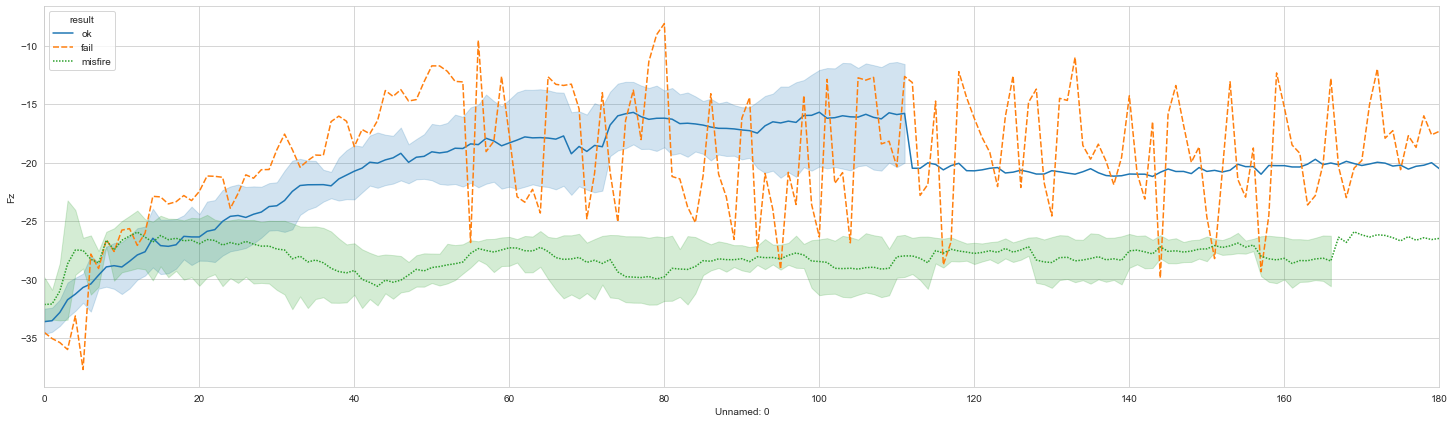

In [179]:
# Sample serie 


sns.lineplot(data=force_df, x='Unnamed: 0', y='Fz', hue='result', style='result')
plt.xlim(0, 180)
#plt.show()

print(force_df['test'].nunique())


In [ ]:
# Time serie 


sns.lineplot(data=force_df, x='Time', y='Fz', hue='result', style='result')
plt.xlim(0, 180)
#plt.show()

print(force_df['test'].nunique())


In [170]:
from scipy.fft import fft, fftfreq

yf = fft(force_df)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

ValueError: could not convert string to float: 'screwing'